<a href="https://colab.research.google.com/github/Kzis/mrt-is/blob/master/Model/Outbound_Random_Forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## for data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
outbound_url = 'https://raw.githubusercontent.com/Kzis/mrt-is/master/Data/Outbound/All_Summary.csv'
outbound_df = pd.read_csv(outbound_url)
outbound_df.head()

,TransactionDate,Right_StationName,PassengerCount,DayType,DateOfWeek,DayNumberOfMonth,MonthPeriod,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total
0,2017-01-01,Bang Sue,240,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,Chatuchak Park,250,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,Hua Lamphong,257,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,Huai Khwang,510,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,Kamphaeng Phet,151,WE,Sunday,1,Early,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
stations_dummies = pd.get_dummies(outbound_df['Right_StationName'])
stations_dummies.head()

,Bang Sue,Chatuchak Park,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Toei,Lat Phrao,Lumphini,Phahon Yothin,Phetchaburi,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Tao Poon,Thailand Cultural Centre
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
day_type_dummies = pd.get_dummies(outbound_df['DayType'])
day_type_dummies.head()

,PH,WD,WE
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [5]:
date_of_week_dummies = pd.get_dummies(outbound_df['DateOfWeek'])
date_of_week_dummies.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [6]:
month_period_dummies = pd.get_dummies(outbound_df['MonthPeriod'])
month_period_dummies.head()

,Early,Late,Mid
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [7]:
outbound_df.drop('TransactionDate', axis=1, inplace=True)
outbound_df.drop('Right_StationName', axis=1, inplace=True)
outbound_df.drop('DayType', axis=1, inplace=True)
outbound_df.drop('DateOfWeek', axis=1, inplace=True)
outbound_df.drop('MonthPeriod', axis=1, inplace=True)

In [8]:
outbound_df =pd.concat([outbound_df ,stations_dummies ], axis=1)
outbound_df =pd.concat([outbound_df ,day_type_dummies ], axis=1)
outbound_df =pd.concat([outbound_df ,date_of_week_dummies ], axis=1)
outbound_df =pd.concat([outbound_df ,month_period_dummies ], axis=1)
outbound_df.head()

,PassengerCount,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Sue,Chatuchak Park,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Toei,Lat Phrao,Lumphini,Phahon Yothin,Phetchaburi,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Tao Poon,Thailand Cultural Centre,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,240,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,250,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,257,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,510,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,151,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [9]:
outbound_df.shape


(6650, 68)

In [10]:
outbound_df.columns


Index(['PassengerCount', 'DayNumberOfMonth', 'MonthNumberOfYear',
       'CalendarQuater', 'Interest_Agriculture', 'Interest_Books',
       'Interest_Business', 'Interest_Education', 'Interest_Family',
       'Interest_Fasion', 'Interest_Foods', 'Interest_General',
       'Interest_Health', 'Interest_IT', 'Interest_Residence',
       'Interest_Seminar', 'Interest_Sports', 'Interest_Travel',
       'Interest_Vehnicle', 'EventsGroup_Agriculture', 'EventsGroup_Books',
       'EventsGroup_Business', 'EventsGroup_Education', 'EventsGroup_Family',
       'EventsGroup_Fasion', 'EventsGroup_Foods', 'EventsGroup_General',
       'EventsGroup_Health', 'EventsGroup_IT', 'EventsGroup_Residence',
       'EventsGroup_Seminar', 'EventsGroup_Sports', 'EventsGroup_Travel',
       'EventsGroup_Vehnicle', 'Interest_Total', 'Events_Total', 'Bang Sue',
       'Chatuchak Park', 'Hua Lamphong', 'Huai Khwang', 'Kamphaeng Phet',
       'Khlong Toei', 'Lat Phrao', 'Lumphini', 'Phahon Yothin', 'Phetchaburi',
   

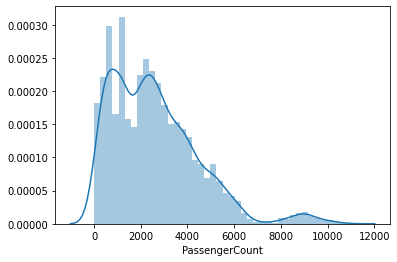

In [11]:
sns.distplot(outbound_df['PassengerCount'])


# Training Model

In [12]:
y = outbound_df['PassengerCount']
outbound_df.drop('PassengerCount', axis=1, inplace=True)
X = outbound_df

In [13]:
X.head()


,DayNumberOfMonth,MonthNumberOfYear,CalendarQuater,Interest_Agriculture,Interest_Books,Interest_Business,Interest_Education,Interest_Family,Interest_Fasion,Interest_Foods,Interest_General,Interest_Health,Interest_IT,Interest_Residence,Interest_Seminar,Interest_Sports,Interest_Travel,Interest_Vehnicle,EventsGroup_Agriculture,EventsGroup_Books,EventsGroup_Business,EventsGroup_Education,EventsGroup_Family,EventsGroup_Fasion,EventsGroup_Foods,EventsGroup_General,EventsGroup_Health,EventsGroup_IT,EventsGroup_Residence,EventsGroup_Seminar,EventsGroup_Sports,EventsGroup_Travel,EventsGroup_Vehnicle,Interest_Total,Events_Total,Bang Sue,Chatuchak Park,Hua Lamphong,Huai Khwang,Kamphaeng Phet,Khlong Toei,Lat Phrao,Lumphini,Phahon Yothin,Phetchaburi,Phra Ram 9,Queen Sirikit National Convention Centre,Ratchadaphisek,Sam Yan,Si Lom,Sukhumvit,Sutthisan,Tao Poon,Thailand Cultural Centre,PH,WD,WE,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Early,Late,Mid
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [14]:
y.head()


0    240
1    250
2    257
3    510
4    151
Name: PassengerCount, dtype: int64

In [15]:
X.shape


(6650, 67)

In [16]:
y.shape


(6650,)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [19]:

print("X_train size : {}".format(X_train.shape))
print("X_test size : {}".format(X_test.shape))
print("y_train size : {}".format(y_train.shape))
print("y_test size : {}".format(y_test.shape))

X_train size : (4655, 67)
X_test size : (1995, 67)
y_train size : (4655,)
y_test size : (1995,)


In [20]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [21]:
y_pred = regressor.predict(X_test)


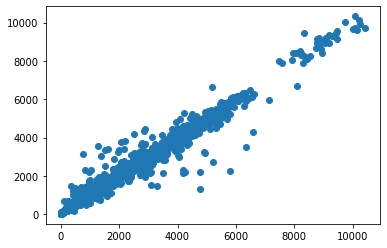

In [22]:
plt.scatter(y_test,y_pred)


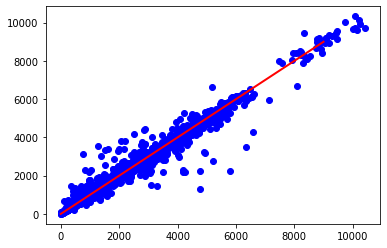

In [23]:
plt.scatter(y_test, y_pred,  color='blue')
plt.plot(range(0,9000), range(0,9000), color='red', linewidth=2)
plt.show()

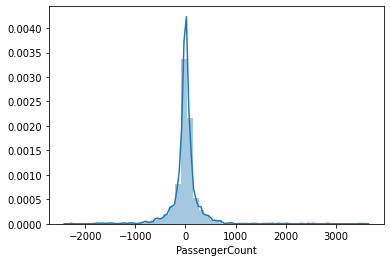

In [24]:
sns.distplot(y_test-y_pred, bins=50)


In [25]:
metrics.mean_absolute_error(y_test, y_pred)


159.02642105263155

In [26]:
metrics.mean_squared_error(y_test, y_pred)


106362.96211754385

In [27]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


326.1333502074632